In [1]:
import tensorflow as tf
import DataRead as dr
import matplotlib.pyplot as plt
import random as rd
import numpy as np

In [2]:
dataCount = 20
fileFullPath = "./ECG/ECG-ID Database/person_01/rec_"

sig,fields,ann,FileteredSig = dr.LoadData(dataCount,fileFullPath)

X_Data = []
Y_Label = []

for fileIndex in range(dataCount):
    #fileIndex = 0
    peakIndexCount , peakIndexArray = dr.GetSingleFilePeak(FileteredSig[fileIndex])

    for peakIndex in range(peakIndexCount):
        peak = peakIndexArray[peakIndex] + rd.randrange(-25,25)
        singleData = FileteredSig[fileIndex][peak-100:peak+200]
        
        if(singleData.shape[0] != 300):
            continue
            
        X_Data.append(singleData)
        Y_Label.append([0,1,0])

X_Data = np.array(X_Data) 
Y_Label = np.array(Y_Label)

In [3]:
X_Data = X_Data[:-100,:]
X_Test = X_Data[-100:,:]

Y_Label = Y_Label[:-100,:]
Y_Test = Y_Label[-100:,:]

print(X_Data.shape)
print(Y_Label.shape)

print(X_Test.shape)
print(Y_Test.shape)

(387, 300)
(387, 3)
(100, 300)
(100, 3)


In [4]:
x_trash_data = []
y_trash_label = []

for dataCount in range(500):
    temp = np.zeros(shape=(300))
    for dataSize in range(300):
        temp[dataSize] = rd.uniform(-0.1,0.6)
    x_trash_data.append(temp)
    y_trash_label.append([1,0,0])
    
x_trash_data = np.array(x_trash_data)
y_trash_label = np.array(y_trash_label)

In [5]:
x_trash_data = x_trash_data[:-100,:]
X_trash_Test = x_trash_data[-100:,:]

y_trash_label = y_trash_label[:-100,:]
Y_trash_Test = y_trash_label[-100:,:]

print(x_trash_data.shape)
print(y_trash_label.shape)

print(X_trash_Test.shape)
print(Y_trash_Test.shape)

(400, 300)
(400, 3)
(100, 300)
(100, 3)


In [6]:
X_total_data = np.concatenate((X_Data,x_trash_data),axis=0)
Y_total_label = np.concatenate((Y_Label,y_trash_label),axis=0)

shuffle = np.append(X_total_data,Y_total_label,axis=1)
np.random.shuffle(shuffle)

X_total_data = shuffle[:,:300]
Y_total_label = shuffle[:,-3:]

X_total_test = np.concatenate((X_Test,X_trash_Test),axis=0)
Y_total_test = np.concatenate((Y_Test,Y_trash_Test),axis=0)

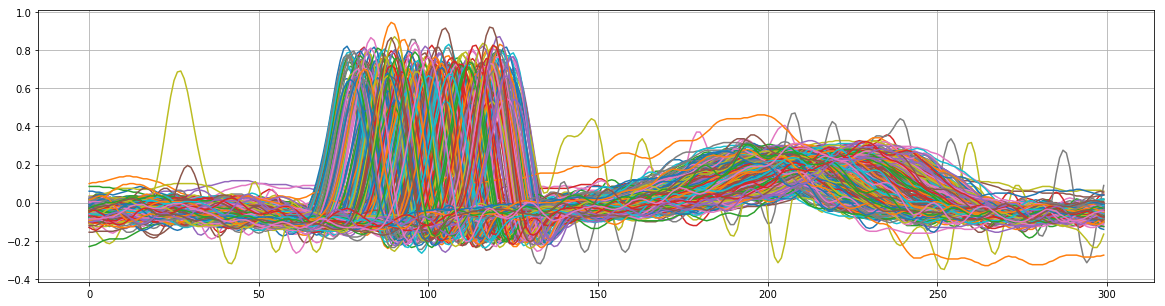

In [7]:
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams['axes.grid'] = True
for i in X_Data:
    plt.plot(i)

In [8]:
X = tf.placeholder(tf.float32,shape=[None,300],name="X_input")
Y = tf.placeholder(tf.int32,shape=[None,3],name="Y_input")
keep = tf.placeholder(tf.float32,name="dropOut")

W1 = tf.Variable(tf.random_normal([300,100]))
b1 = tf.Variable(tf.ones([100]))
L1 = tf.matmul(X,W1)+b1
L1 = tf.nn.dropout(L1,keep)

W2 = tf.Variable(tf.random_normal([100,50]))
b2 = tf.Variable(tf.ones([50]))
L2 = tf.matmul(L1,W2)+b2
L2 = tf.nn.dropout(L2,keep)

W3 = tf.Variable(tf.random_normal([50,3]))
b3 = tf.Variable(tf.ones([3]))
model = tf.matmul(L2,W3)+b3

y_ = tf.nn.softmax(model)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model,labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

cost_summary = tf.summary.scalar('cost',cost)
summary = tf.summary.merge_all()

prediction = tf.argmax(y_,1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction,tf.argmax(Y,1)),dtype=tf.float32))

In [11]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

writer=tf.summary.FileWriter("./logFile",sess.graph)

for step in range(1000):
    costVal,trainVal = sess.run([cost,train],feed_dict={X : X_total_data, Y : Y_total_label, keep:0.5})
    
    #if step % 100 == 0:
        #print("step : " + str(step))
        #print("cost : " + str(costVal))
    #print("cost = " + str(costVal))# + ",, train = " + str(trainVal))
    #writer.add_summary(costVal)


In [10]:
print(Y_total_label[:10,:])

[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]


In [11]:
print(sess.run(accuracy,feed_dict={X:X_total_test,Y:Y_total_test,keep:0.5}))

1.0


In [12]:
dataCount = 1
fileFullPath = "./ECG/ECG-ID Database/person_02/rec_"

sig,fields,ann,FilteredSig = dr.LoadData(dataCount,fileFullPath)

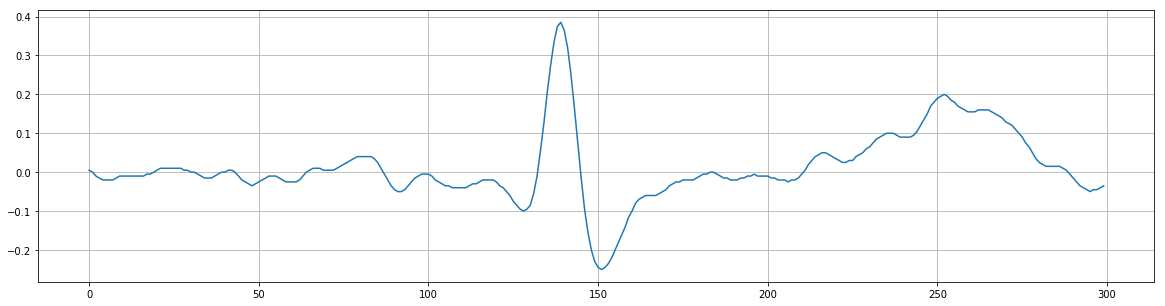

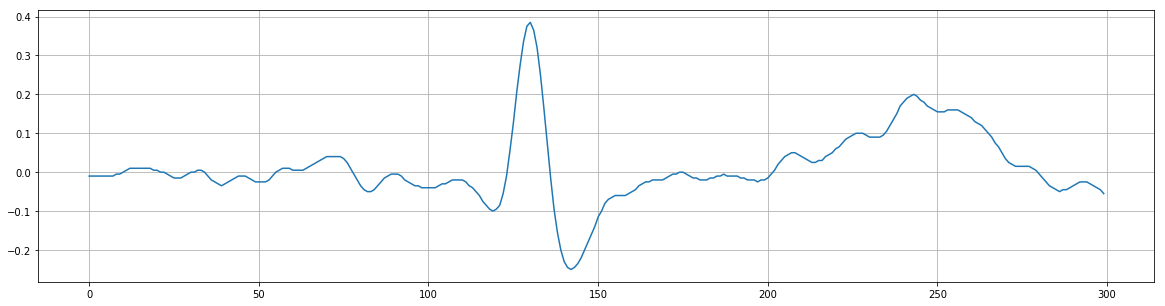

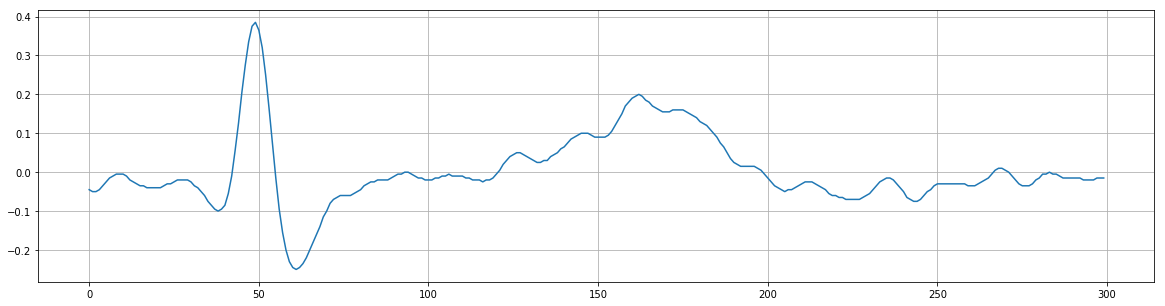

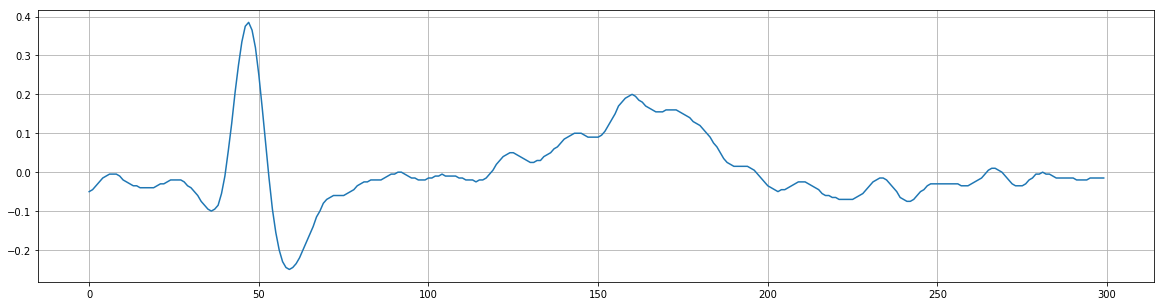

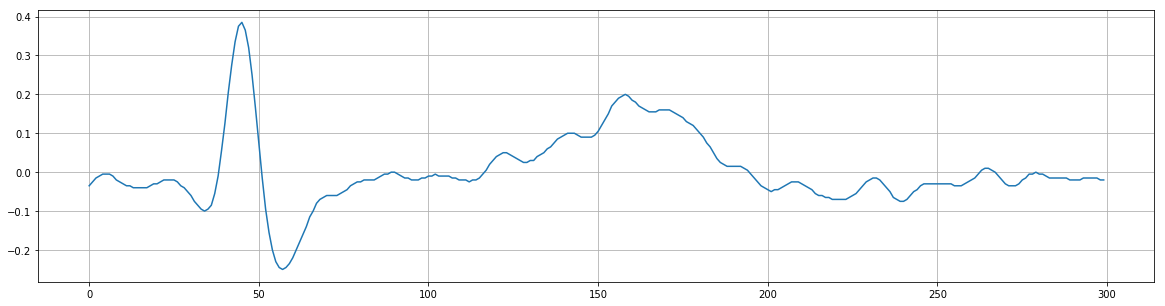

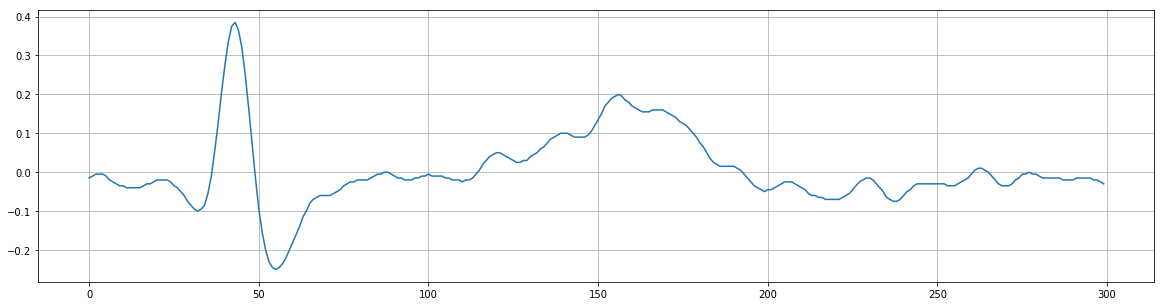

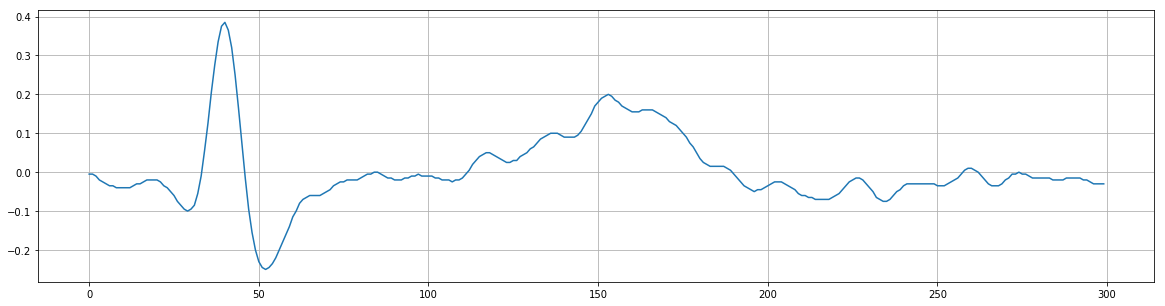

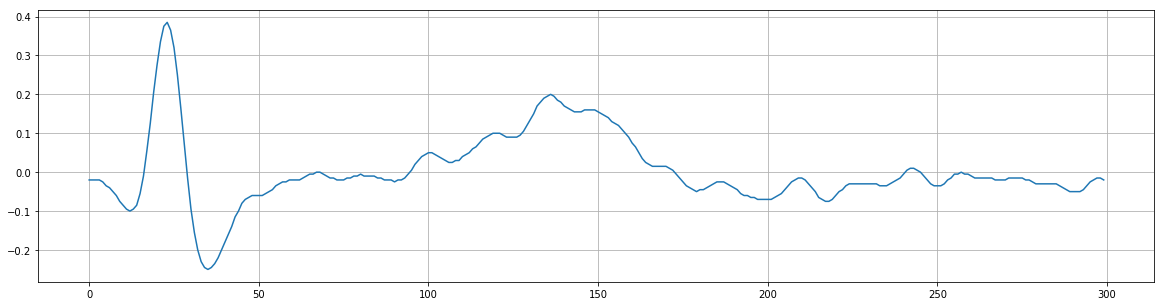

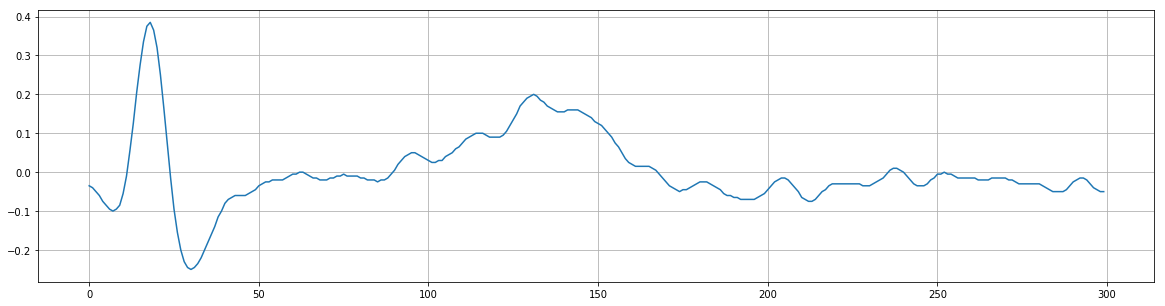

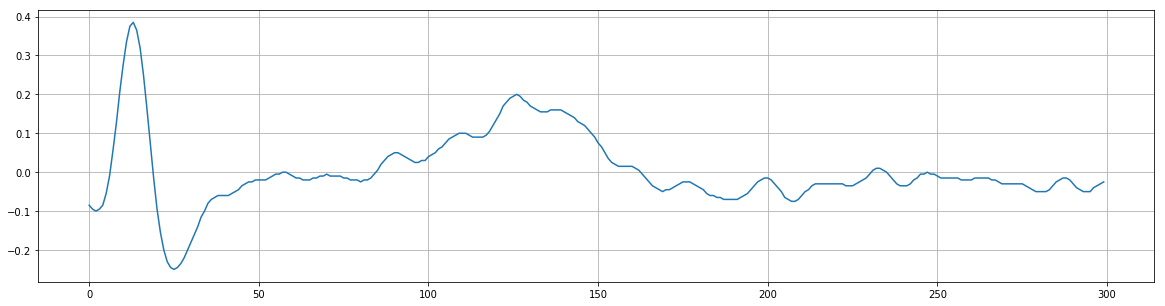

In [14]:
for i in range(150,9850):
    inputSig = FilteredSig[0][i-150:i+150].reshape(1,300)
    result = sess.run(prediction,feed_dict={X:inputSig,keep:0.5})
    #print(result)
    if(result == 0):
        plt.plot(inputSig[0])
        plt.show()
    
    if(i == 300):
        break